In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob

import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import warnings
warnings.filterwarnings('ignore')

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

data=glob('서울특별시 공공자전거 이용정보(시간대별)_20*.csv')
data_total=[]
for i in data:
    try:
        data_total.append(pd.read_csv(i,encoding='utf-8'))
        data_con=pd.concat(data_total,axis=0)
    except:
        data_total.append(pd.read_csv(i,encoding='cp949'))
        data_con=pd.concat(data_total,axis=0)
    data_fin=pd.DataFrame(data_con)

data_fin.head()

data_fin.to_csv('data.csv',encoding='utf-8')

In [ ]:
data_fin=pd.read_csv('data.csv',index_col=0,encoding='utf-8')
data_fin

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-01-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,33.96,0.3,1280.00,6
1,2020-01-01,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,40.15,0.39,1690.00,6
2,2020-01-01,0,1337,1337. 돈암성당 옆,정기권,NaN,~10대,1,80.88,0.5,2150.00,12
3,2020-01-01,0,1984,1984. 구로구청,정기권,NaN,~10대,1,47.36,0.43,1840.00,25
4,2020-01-01,0,2601,2601. 석촌호수 서호사거리,정기권,NaN,~10대,1,29.34,0.26,1140.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1066896,2020-12-31,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.00,13
1066897,2020-12-31,23,560,560. 비전교회 앞,일일권,M,30대,1,0.00,0.00,0.00,52
1066898,2020-12-31,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,711.99,4
1066899,2020-12-31,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,647.86,7


# 자전거 데이터 성별 설정

In [ ]:
def sex_trans(sex):
    if sex == 'm' :
        return 'M'
    elif sex == 'f':
        return 'F'
    else:
        return sex
data_fin['성별']=data_fin['성별'].apply(sex_trans)
sex_dt=pd.pivot_table(data_fin,index='성별',
                   values='이용건수',aggfunc='sum').reset_index()
data_fin
sex_dt

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-01-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,33.96,0.3,1280.00,6
1,2020-01-01,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,40.15,0.39,1690.00,6
2,2020-01-01,0,1337,1337. 돈암성당 옆,정기권,NaN,~10대,1,80.88,0.5,2150.00,12
3,2020-01-01,0,1984,1984. 구로구청,정기권,NaN,~10대,1,47.36,0.43,1840.00,25
4,2020-01-01,0,2601,2601. 석촌호수 서호사거리,정기권,NaN,~10대,1,29.34,0.26,1140.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1066896,2020-12-31,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.00,13
1066897,2020-12-31,23,560,560. 비전교회 앞,일일권,M,30대,1,0.00,0.00,0.00,52
1066898,2020-12-31,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,711.99,4
1066899,2020-12-31,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,647.86,7


,성별,이용건수
0,F,4296004
1,M,6597081


In [ ]:
spot=pd.pivot_table(data_fin,index=['대여시간','대여소번호'],values='이용건수',aggfunc='sum').reset_index()
spot

,대여시간,대여소번호,이용건수
0,0,10,6
1,0,101,222
2,0,102,828
3,0,103,748
4,0,104,299
...,...,...,...
51019,23,4711,82
51020,23,4761,1
51021,23,4784,2
51022,23,4791,2


In [ ]:
time_dt=pd.pivot_table(data_fin,index=['대여일자','대여시간'],
                   values='이용건수',aggfunc='sum').reset_index()
time_dt

,대여일자,대여시간,이용건수
0,2020-01-01,0,599
1,2020-01-01,1,847
2,2020-01-01,2,748
3,2020-01-01,3,472
4,2020-01-01,4,344
...,...,...,...
8760,2020-12-31,19,1340
8761,2020-12-31,20,1062
8762,2020-12-31,21,900
8763,2020-12-31,22,537


In [ ]:
time_dt['대여일자']=pd.to_datetime(time_dt['대여일자']).dt.date

In [ ]:
## 시간당 이용률 반환
ration=pd.pivot_table(data_fin,index='대여일자',values='이용건수',aggfunc='count').reset_index()
ration['일 합계']=ration.이용건수
ration.drop('이용건수',axis=1,inplace=True)
ration['대여일자']=pd.to_datetime(ration['대여일자']).dt.date
ration

,대여일자,일 합계
0,2020-01-01,14653
1,2020-01-02,25593
2,2020-01-03,27374
3,2020-01-04,23012
4,2020-01-05,20736
...,...,...
361,2020-12-27,32647
362,2020-12-28,41453
363,2020-12-29,32379
364,2020-12-30,20894


In [ ]:
tot = pd.merge(time_dt,ration,how='left',on='대여일자')
tot

,대여일자,대여시간,이용건수,일 합계
0,2020-01-01,0,599,14653
1,2020-01-01,1,847,14653
2,2020-01-01,2,748,14653
3,2020-01-01,3,472,14653
4,2020-01-01,4,344,14653
...,...,...,...,...
8760,2020-12-31,19,1340,22827
8761,2020-12-31,20,1062,22827
8762,2020-12-31,21,900,22827
8763,2020-12-31,22,537,22827


In [ ]:
tot['시간당 이용률']=(tot.이용건수/tot['일 합계'])*100
tot

,대여일자,대여시간,이용건수,일 합계,시간당 이용률
0,2020-01-01,0,599,14653,4.087900
1,2020-01-01,1,847,14653,5.780386
2,2020-01-01,2,748,14653,5.104757
3,2020-01-01,3,472,14653,3.221183
4,2020-01-01,4,344,14653,2.347642
...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241
8761,2020-12-31,20,1062,22827,4.652385
8762,2020-12-31,21,900,22827,3.942699
8763,2020-12-31,22,537,22827,2.352477


In [ ]:
age_dt=pd.pivot_table(data_fin,index='연령대코드',
                   values='이용건수',aggfunc='sum').reset_index()
age_dt

,연령대코드,이용건수
0,20대,10684995
1,30대,5335555
2,40대,3372008
3,50대,1928582
4,60대,491492
5,70대~,87287
6,~10대,1371828


In [ ]:
type_dt=pd.pivot_table(data_fin,index='대여구분코드',
                   values='이용건수',aggfunc='sum').reset_index()
type_dt

,대여구분코드,이용건수
0,단기권(전기),3
1,단체권,247894
2,일일권,5427348
3,일일권(비회원),295
4,정기권,17596207


<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

<AxesSubplot:xlabel='성별', ylabel='이용건수'>

<AxesSubplot:xlabel='연령대코드', ylabel='이용건수'>

<AxesSubplot:xlabel='대여구분코드', ylabel='이용건수'>

<AxesSubplot:xlabel='대여일자', ylabel='이용건수'>

<AxesSubplot:xlabel='대여일자', ylabel='이용건수'>

[Text(0.5, 0, '대여구분코드')]

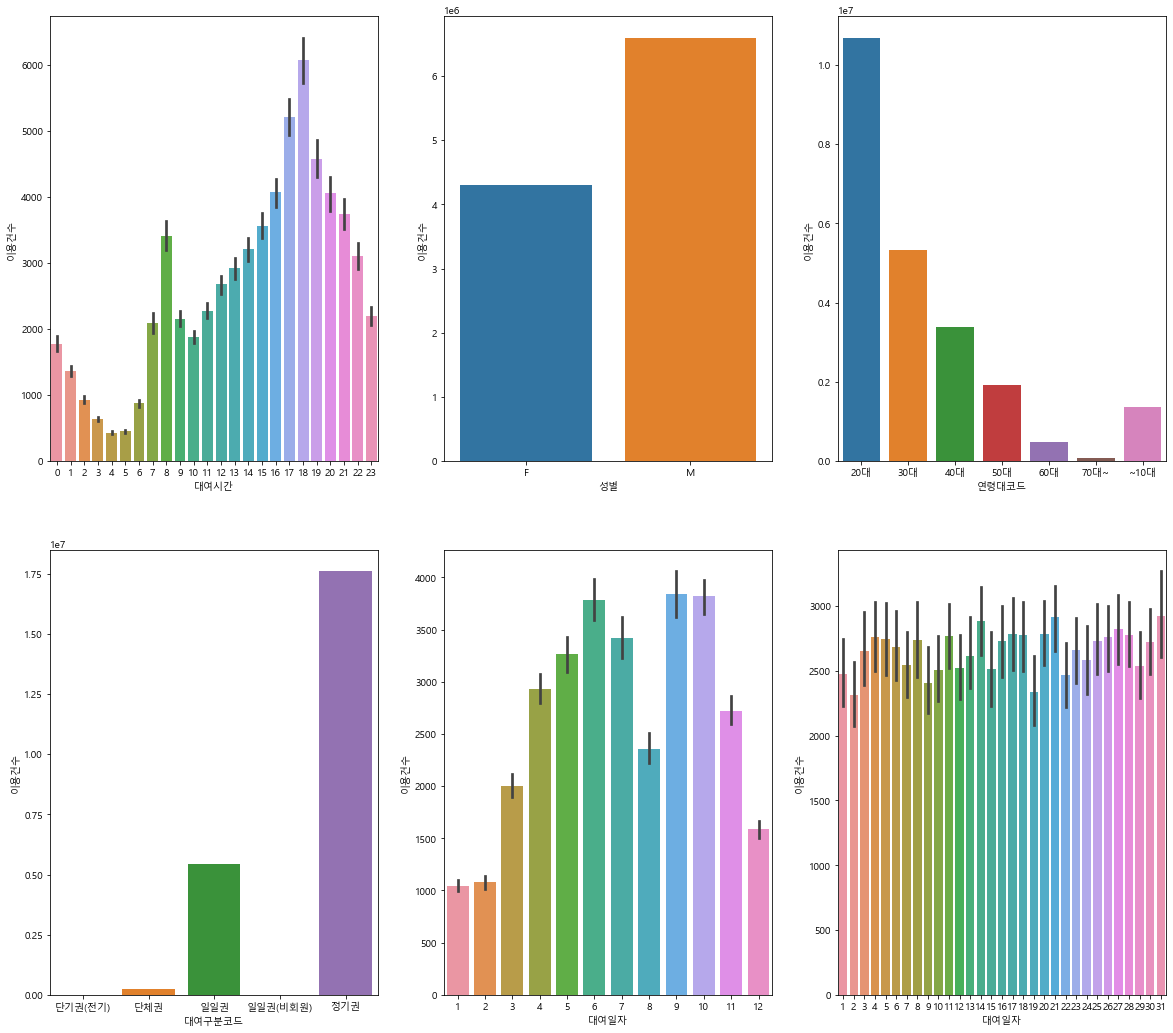

In [ ]:
time_dt['대여일자']=pd.to_datetime(time_dt['대여일자'])
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(20,18)
tot['대여일자']=pd.to_datetime(tot['대여일자'])
sns.barplot(data=time_dt,x='대여시간',y='이용건수',ax=ax1)
sns.barplot(data=sex_dt,x='성별',y='이용건수',ax=ax2)
sns.barplot(data=age_dt,x='연령대코드',y='이용건수',ax=ax3)
sns.barplot(data=type_dt,x='대여구분코드',y='이용건수',ax=ax4)
sns.barplot(data=time_dt,x=time_dt['대여일자'].dt.month,y='이용건수',ax=ax5)
sns.barplot(data=time_dt,x=time_dt['대여일자'].dt.day,y='이용건수',ax=ax6)

ax4.set(xlabel='대여구분코드')

In [ ]:
## 휴일인지 
from pytimekr import pytimekr

holidays_in_2020 = pytimekr.holidays(year=2020)
holidays_in_2020
def return_holidays(x):
    if x in holidays_in_2020:
        return '휴일'
    elif x.weekday() in range(5):
        return '평일'
    elif x.weekday() in range(5,8):
        return '휴일'

tot['평일/휴일']=tot['대여일자'].apply(return_holidays)

def return_day(x):
    if x.weekday() == 0:
        return '월'
    elif x.weekday() == 1:
        return '화'
    elif x.weekday() == 2:
        return '수'
    elif x.weekday() == 3:
        return '목'
    elif x.weekday() == 4:
        return '금'
    elif x.weekday() == 5:
        return '토'
    elif x.weekday() == 6:
        return '일'
tot['요일']=tot['대여일자'].apply(return_day)
    

## 출퇴근시간인지
def work_hour(x):
    if x in [7,8,9]: # 3
        return '출근시간대'
    elif x in [17,18,19]: # 3 
        return '퇴근시간대'
    else:
        return '출/퇴근 외 시간대'  # 0,1,2,3,4,5,6,10,11,12,13,14,15,16,20,21,22,23
tot['시간대']=tot['대여시간'].apply(work_hour)

## 계절특성을 따르는지
def season(x):
    if x.month in [12,1,2]:
        return '겨울'
    elif x.month in [3,4,5]:
        return '봄'
    elif x.month in [6,7,8]:
        return '여름'
    elif x.month in [9,10,11]:
        return '가을'
tot['계절']=tot['대여일자'].apply(season)

tot['월']= tot['대여일자'].dt.month
tot['일']= tot['대여일자'].dt.day

tot

[datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 9, 30),
 datetime.date(2020, 10, 1),
 datetime.date(2020, 10, 2),
 datetime.date(2020, 1, 1),
 datetime.date(2020, 3, 1),
 datetime.date(2020, 5, 5),
 datetime.date(2020, 4, 30),
 datetime.date(2020, 6, 6),
 datetime.date(2020, 8, 15),
 datetime.date(2020, 10, 9),
 datetime.date(2020, 10, 3),
 datetime.date(2020, 12, 25)]

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31


In [ ]:
tot.isnull().describe()

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일
count,8765,8765,8765,8765,8765,8765,8765,8765,8765,8765,8765
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,8765,8765,8765,8765,8765,8765,8765,8765,8765,8765,8765


spot_time=pd.pivot_table(spot,index=['시간대','대여소명'],
                         values='이용건수',aggfunc='sum').reset_index()
spot_time
sns.heatmap(spot_time,cmap=sns.light_palette('red',as_cmap=True),annot=True,fmt='d')


<AxesSubplot:xlabel='계절', ylabel='이용건수'>

<AxesSubplot:xlabel='평일/휴일', ylabel='이용건수'>

<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

<AxesSubplot:xlabel='시간대', ylabel='이용건수'>

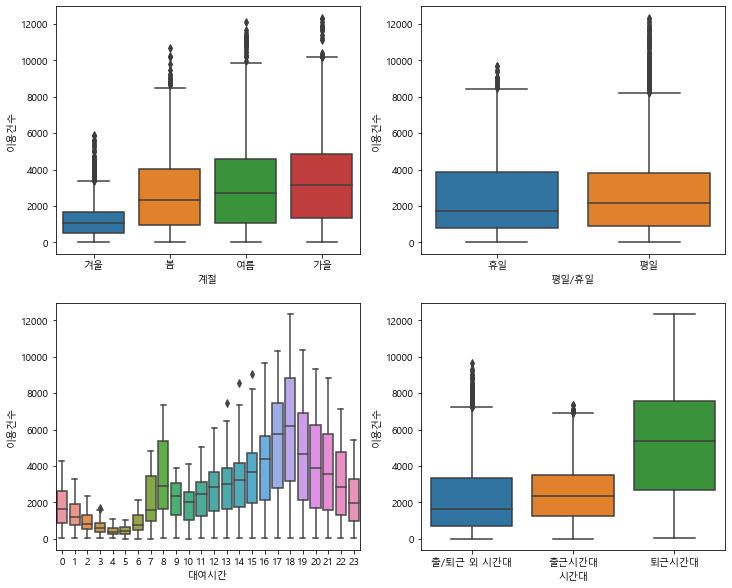

In [ ]:
fig ,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=tot,x='계절',y='이용건수',ax=axes[0][0])
sns.boxplot(data=tot,x='평일/휴일',y='이용건수',ax=axes[0][1])
sns.boxplot(data=tot,x='대여시간',y='이용건수',ax=axes[1][0])
sns.boxplot(data=tot,x='시간대',y='이용건수',ax=axes[1][1])

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

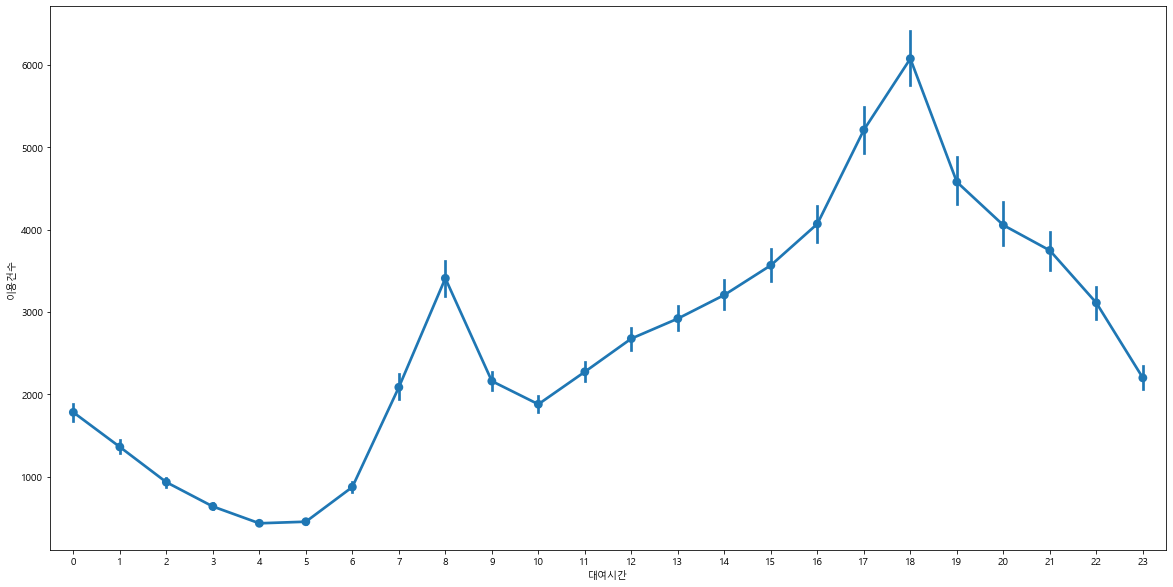

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=tot,x='대여시간',y='이용건수')

,이용건수
요일,
금,3522169
목,3514328
수,3270967
월,3223533
일,3008711
토,3284838
화,3447201


<AxesSubplot:xlabel='요일', ylabel='이용건수'>

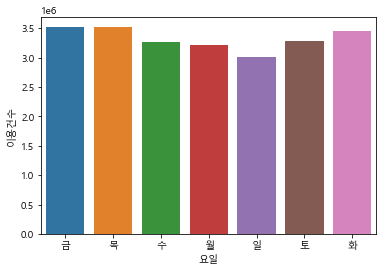

In [ ]:
complexes = pd.pivot_table(tot,index='요일',values='이용건수',aggfunc='sum')
complexes
sns.barplot(x=complexes.index,y=complexes['이용건수'])

<AxesSubplot:ylabel='요일'>

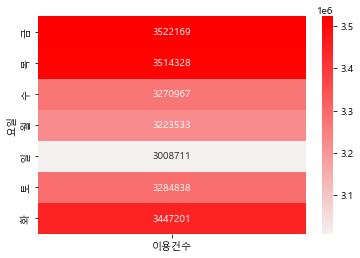

In [ ]:
sns.heatmap(complexes,cmap=sns.light_palette('red',as_cmap=True),annot=True,fmt='d')

In [ ]:
complexes = pd.pivot_table(tot,index='평일/휴일',values='이용건수',aggfunc='sum')
complexes

,이용건수
평일/휴일,
평일,16411229
휴일,6860518


In [ ]:
complexes = pd.pivot_table(tot,index=['평일/휴일','시간대'],values='시간당 이용률',aggfunc='mean')
complexes

시간당 이용률
평일/휴일 시간대                  
평일    출/퇴근 외 시간대   3.951973
      출근시간대        5.877378
      퇴근시간대       10.282496
휴일    출/퇴근 외 시간대   4.833953
      출근시간대        2.591342
      퇴근시간대        8.247380

<AxesSubplot:ylabel='평일/휴일-시간대'>

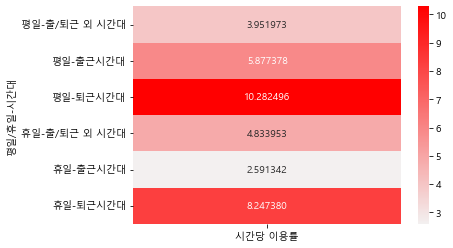

In [ ]:
sns.heatmap(complexes,cmap=sns.light_palette('red',as_cmap=True),annot=True,fmt='f')

In [ ]:
## 이상치 제거 ???
tot

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31


<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

[[Text(-5.0, 0, '월'),
  Text(0.0, 0, ''),
  Text(5.0, 0, ''),
  Text(10.0, 0, ''),
  Text(15.0, 0, ''),
  Text(20.0, 0, ''),
  Text(25.0, 0, '')]]

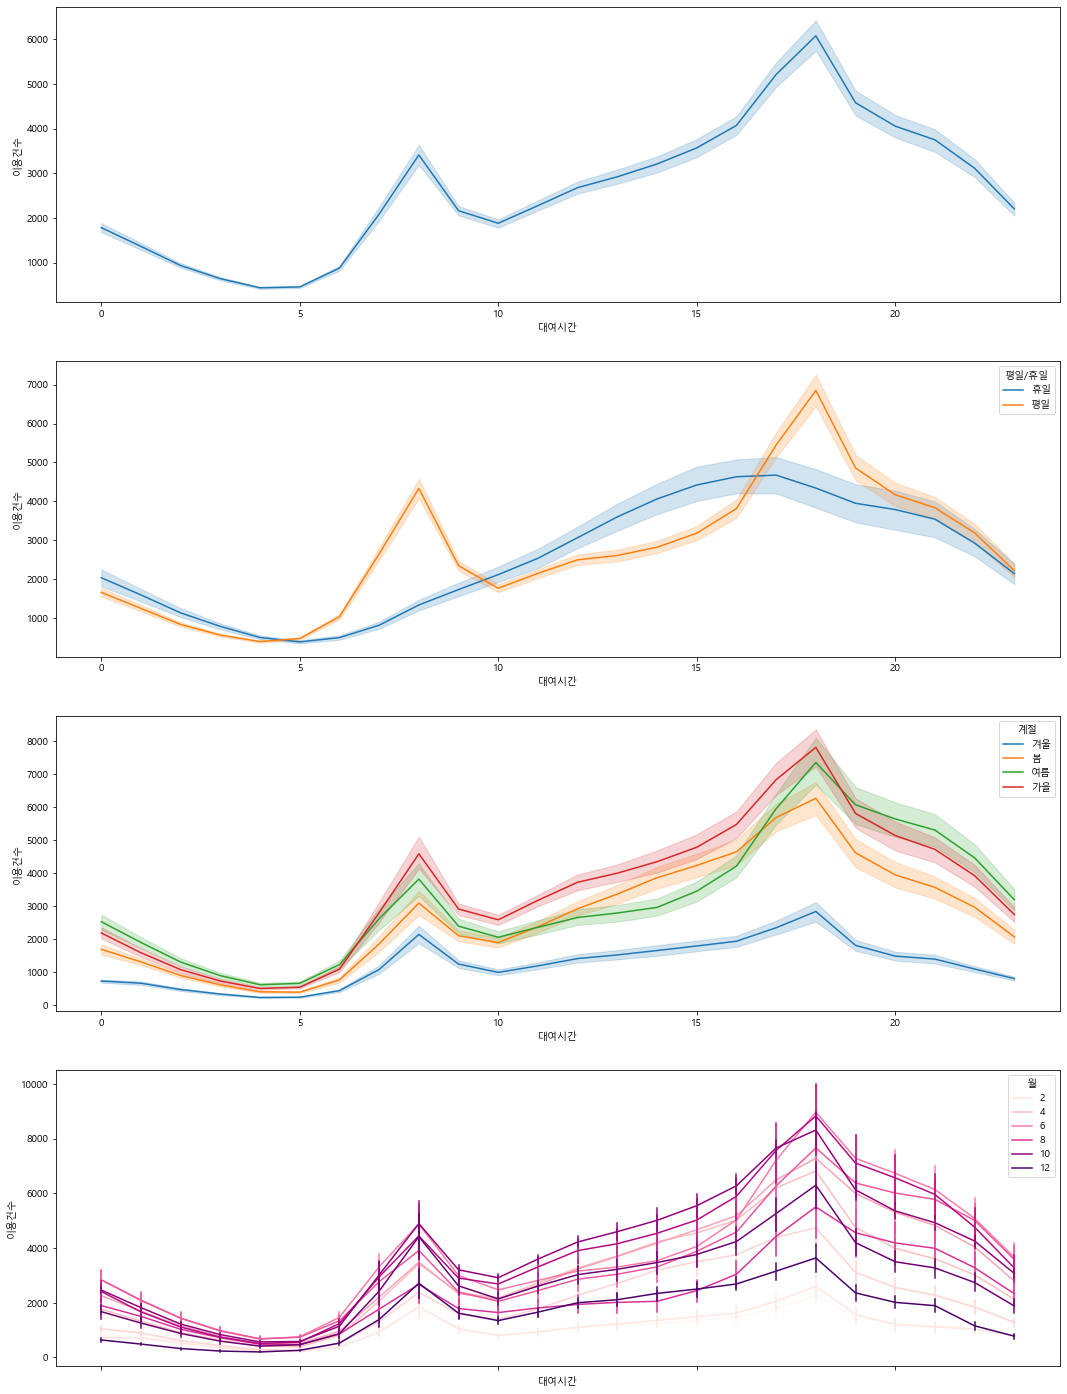

In [ ]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=4)
fig.set_size_inches(18,25)
sns.lineplot(data=tot,x='대여시간',y='이용건수',ax=ax1)
sns.lineplot(data=tot,x='대여시간',y='이용건수',hue='평일/휴일',ax=ax2)
sns.lineplot(data=tot,x='대여시간',y='이용건수',hue='계절',ax=ax3)
sns.lineplot(data=tot,x='대여시간',y='이용건수',err_style='bars',palette='RdPu',hue='월',ax=ax4).set(xticklabels='월')


In [ ]:
### 이상치 제거??

In [ ]:
complexes = pd.pivot_table(tot,index=['계절','평일/휴일','시간대'],values='시간당 이용률',aggfunc='mean')
complexes

시간당 이용률
계절 평일/휴일 시간대                  
가을 평일    출/퇴근 외 시간대   3.924145
         출근시간대        6.098491
         퇴근시간대       10.528627
   휴일    출/퇴근 외 시간대   4.870290
         출근시간대        2.668876
         퇴근시간대        8.116985
겨울 평일    출/퇴근 외 시간대   3.539020
         출근시간대        6.616183
         퇴근시간대        8.972811
   휴일    출/퇴근 외 시간대   4.441568
         출근시간대        2.579803
         퇴근시간대        7.029211
봄  평일    출/퇴근 외 시간대   4.155021
         출근시간대        5.456756
         퇴근시간대       10.872538
   휴일    출/퇴근 외 시간대   5.186262
         출근시간대        2.309599
         퇴근시간대        9.373332
여름 평일    출/퇴근 외 시간대   4.180949
         출근시간대        5.361478
         퇴근시간대       10.744274
   휴일    출/퇴근 외 시간대   4.821634
         출근시간대        2.828560
         퇴근시간대        8.453839

<AxesSubplot:ylabel='계절-평일/휴일-시간대'>

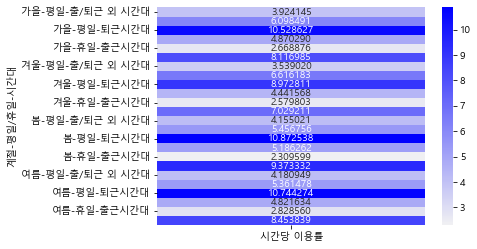

In [ ]:
sns.heatmap(complexes,cmap=sns.light_palette('blue',as_cmap=True),annot=True,fmt='f')

In [ ]:
weather=pd.read_csv('날씨데이터_2020.csv',encoding='cp949')
weather = weather.fillna(0)
weather.head(30)

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,108,서울,2020-01-01 0:00,-6.5,0.0,0.0,38,0.0
1,108,서울,2020-01-01 1:00,-5.9,0.0,1.7,40,0.0
2,108,서울,2020-01-01 2:00,-5.7,0.0,0.1,42,0.0
3,108,서울,2020-01-01 3:00,-5.6,0.0,0.0,46,0.0
4,108,서울,2020-01-01 4:00,-5.4,0.0,0.0,50,0.0
5,108,서울,2020-01-01 5:00,-5.2,0.0,0.0,55,0.0
6,108,서울,2020-01-01 6:00,-4.8,0.0,1.9,58,0.0
7,108,서울,2020-01-01 7:00,-4.6,0.0,2.1,62,0.0
8,108,서울,2020-01-01 8:00,-4.6,0.0,1.8,64,0.0
9,108,서울,2020-01-01 9:00,-4.3,0.0,2.3,70,0.0


In [ ]:
weather['일시']=pd.to_datetime(weather['일시'])
weather['대여시간']=weather['일시'].dt.hour
weather['대여일자']=weather['일시']
weath=weather[['대여일자','대여시간','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)']]
weath

,대여일자,대여시간,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,2020-01-01 00:00:00,0,-6.5,0.0,0.0,38,0.0
1,2020-01-01 01:00:00,1,-5.9,0.0,1.7,40,0.0
2,2020-01-01 02:00:00,2,-5.7,0.0,0.1,42,0.0
3,2020-01-01 03:00:00,3,-5.6,0.0,0.0,46,0.0
4,2020-01-01 04:00:00,4,-5.4,0.0,0.0,50,0.0
...,...,...,...,...,...,...,...
8780,2020-12-31 20:00:00,20,-7.1,0.0,3.2,59,0.0
8781,2020-12-31 21:00:00,21,-7.2,0.0,2.7,61,0.0
8782,2020-12-31 22:00:00,22,-7.4,0.0,2.5,66,0.0
8783,2020-12-31 23:00:00,23,-7.6,0.0,2.2,65,0.0


In [ ]:
tot.head()
tot.to_csv('bike_data.csv')

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1


In [ ]:
bike=pd.read_csv('bike_data.csv',index_col=0,encoding='utf-8')
bike

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31


In [ ]:
weath.to_csv('weather_data.csv')

In [ ]:
weather_data=pd.read_csv('weather_data.csv',index_col=0,encoding='utf-8')
weather=weather_data[:-1]
bike['대여일자']=pd.to_datetime(bike['대여일자'])
weather['대여일자']=pd.to_datetime(weather['대여일자'])
weather['대여일자']=weather['대여일자'].dt.date
weather

,대여일자,대여시간,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,2020-01-01,0,-6.5,0.0,0.0,38,0.0
1,2020-01-01,1,-5.9,0.0,1.7,40,0.0
2,2020-01-01,2,-5.7,0.0,0.1,42,0.0
3,2020-01-01,3,-5.6,0.0,0.0,46,0.0
4,2020-01-01,4,-5.4,0.0,0.0,50,0.0
...,...,...,...,...,...,...,...
8779,2020-12-31,19,-7.1,0.0,2.4,58,0.0
8780,2020-12-31,20,-7.1,0.0,3.2,59,0.0
8781,2020-12-31,21,-7.2,0.0,2.7,61,0.0
8782,2020-12-31,22,-7.4,0.0,2.5,66,0.0


In [ ]:
bike['대여일자']=bike['대여일자'].dt.date
bike

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31


# 날씨데이터 자전거데이터 통합

In [ ]:

data=pd.merge(bike,weather,how='left',on=['대여일자','대여시간'])
data

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1,-6.5,0.0,0.0,38,0.0
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.9,0.0,1.7,40,0.0
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.7,0.0,0.1,42,0.0
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.6,0.0,0.0,46,0.0
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.4,0.0,0.0,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31,-7.1,0.0,2.4,58,0.0
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.1,0.0,3.2,59,0.0
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.2,0.0,2.7,61,0.0
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.4,0.0,2.5,66,0.0


In [ ]:
data['기온(°C)'].fillna(33.7,inplace=True)

In [ ]:
data.describe()

,대여시간,이용건수,일 합계,시간당 이용률,월,일,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000
mean,11.502567,2655.076669,52033.284084,4.983688,6.510439,15.733029,13.235003,0.187530,2.370154,63.228408,0.032481
std,6.921523,2265.672936,22961.092768,3.352884,3.454475,8.806695,10.058392,1.439065,1.193846,20.048153,0.262632
min,0.000000,8.000000,1855.000000,0.013859,1.000000,1.000000,-12.900000,0.000000,0.000000,11.000000,0.000000
25%,6.000000,849.000000,31098.000000,2.164472,4.000000,8.000000,5.000000,0.000000,1.500000,48.000000,0.000000
50%,12.000000,2019.000000,54768.000000,4.585496,7.000000,16.000000,13.800000,0.000000,2.200000,64.000000,0.000000
75%,17.000000,3828.000000,72988.000000,7.097976,10.000000,23.000000,22.100000,0.000000,3.100000,79.000000,0.000000
max,23.000000,12337.000000,92170.000000,30.240175,12.000000,31.000000,35.200000,42.100000,8.000000,100.000000,5.500000


<AxesSubplot:xlabel='기온(°C)', ylabel='이용건수'>

<AxesSubplot:xlabel='풍속(m/s)', ylabel='이용건수'>

<AxesSubplot:xlabel='강수량(mm)', ylabel='이용건수'>

<AxesSubplot:xlabel='적설(cm)', ylabel='이용건수'>

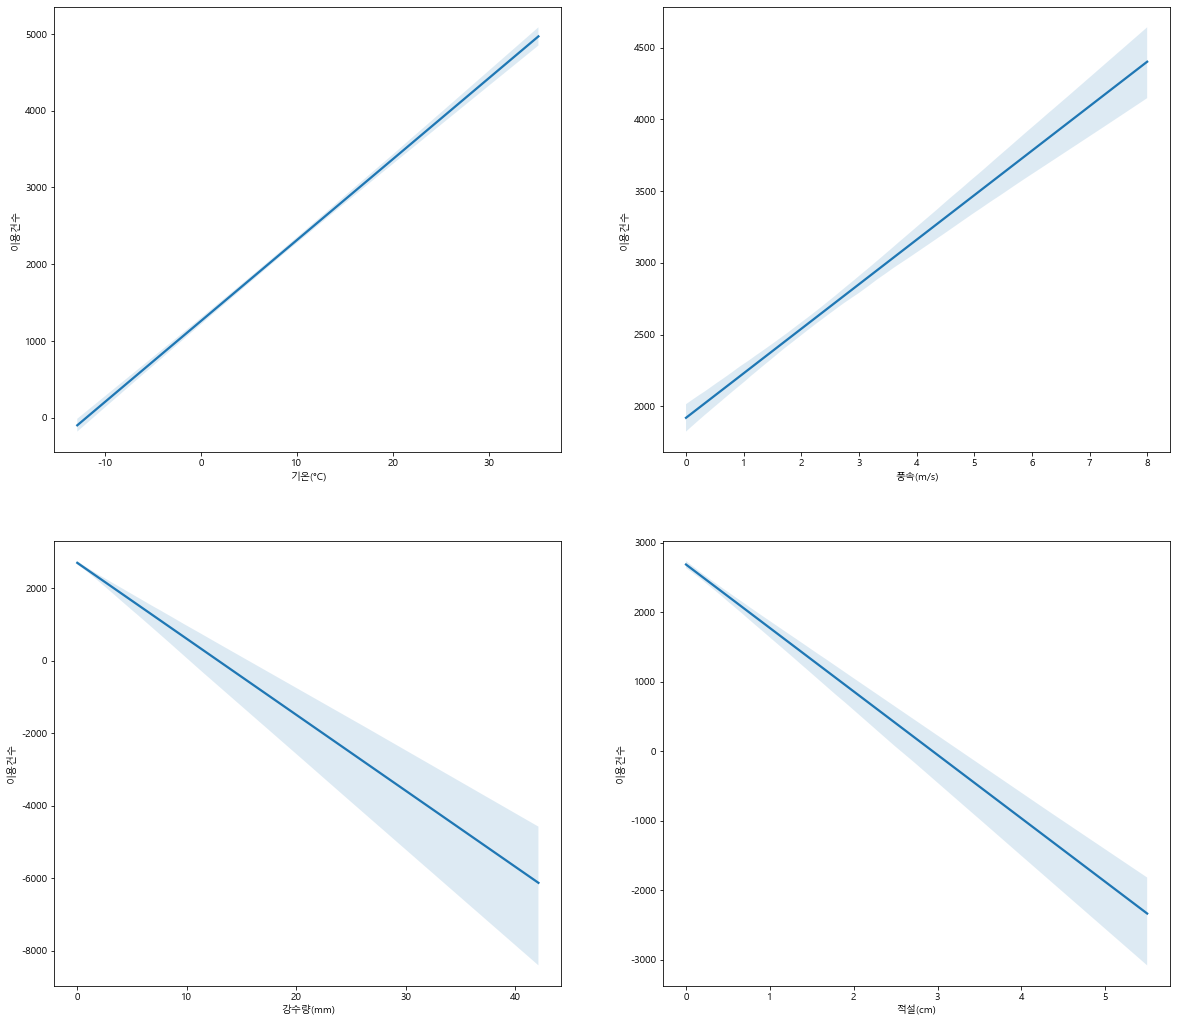

In [ ]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,18)

sns.regplot(x='기온(°C)',y='이용건수',scatter=False,data=data,fit_reg=True,ax=ax1)
sns.regplot(x='풍속(m/s)',y='이용건수',scatter=False,data=data,fit_reg=True,ax=ax2)
sns.regplot(x='강수량(mm)',y='이용건수',scatter=False,data=data,fit_reg=True,ax=ax3)
sns.regplot(x='적설(cm)',y='이용건수',scatter=False,data=data,fit_reg=True,ax=ax4)


<AxesSubplot:xlabel='습도(%)', ylabel='이용건수'>

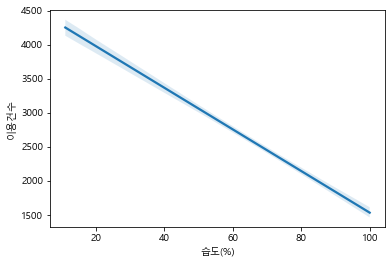

In [ ]:
sns.regplot(x='습도(%)',y='이용건수',scatter=False,data=data,fit_reg=True)

In [ ]:
data['강수량(mm)'].value_counts()

0.0     8148
0.2       72
0.1       72
0.3       54
0.5       32
        ... 
16.3       1
21.6       1
11.7       1
11.0       1
36.8       1
Name: 강수량(mm), Length: 117, dtype: int64

In [ ]:
data['적설(cm)'].describe()

count    8765.000000
mean        0.032481
std         0.262632
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.500000
Name: 적설(cm), dtype: float64

In [ ]:
data

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1,-6.5,0.0,0.0,38,0.0
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.9,0.0,1.7,40,0.0
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.7,0.0,0.1,42,0.0
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.6,0.0,0.0,46,0.0
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.4,0.0,0.0,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31,-7.1,0.0,2.4,58,0.0
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.1,0.0,3.2,59,0.0
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.2,0.0,2.7,61,0.0
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.4,0.0,2.5,66,0.0


In [ ]:
## 우천여부 설정 
sel=[]
for i in range(len(data)):
    if data['강수량(mm)'][i] > 0.5 or data['적설(cm)'][i] > 0.1:
        sel.append(0)
    elif data['강수량(mm)'][i] <=0.5 or data['적설(cm)'][i] <= 0.1:
        sel.append(1)


In [ ]:
data['우천여부']=sel
data['우천여부'].describe()
data

count    8765.000000
mean        0.934969
std         0.246595
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: 우천여부, dtype: float64

,대여일자,대여시간,이용건수,일 합계,시간당 이용률,평일/휴일,요일,시간대,계절,월,일,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),우천여부
0,2020-01-01,0,599,14653,4.087900,휴일,수,출/퇴근 외 시간대,겨울,1,1,-6.5,0.0,0.0,38,0.0,1
1,2020-01-01,1,847,14653,5.780386,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.9,0.0,1.7,40,0.0,1
2,2020-01-01,2,748,14653,5.104757,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.7,0.0,0.1,42,0.0,1
3,2020-01-01,3,472,14653,3.221183,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.6,0.0,0.0,46,0.0,1
4,2020-01-01,4,344,14653,2.347642,휴일,수,출/퇴근 외 시간대,겨울,1,1,-5.4,0.0,0.0,50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,2020-12-31,19,1340,22827,5.870241,평일,목,퇴근시간대,겨울,12,31,-7.1,0.0,2.4,58,0.0,1
8761,2020-12-31,20,1062,22827,4.652385,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.1,0.0,3.2,59,0.0,1
8762,2020-12-31,21,900,22827,3.942699,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.2,0.0,2.7,61,0.0,1
8763,2020-12-31,22,537,22827,2.352477,평일,목,출/퇴근 외 시간대,겨울,12,31,-7.4,0.0,2.5,66,0.0,1


,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),월,이용건수,일 합계,시간당 이용률
기온(°C),1.000000,0.090788,0.075216,0.272235,-0.225265,0.177356,0.467496,0.582913,0.216410
강수량(mm),0.090788,1.000000,0.100889,0.204568,-0.009839,0.028287,-0.133162,-0.135282,-0.137902
풍속(m/s),0.075216,0.100889,1.000000,-0.200812,0.089239,-0.053093,0.163428,-0.108387,0.247022
습도(%),0.272235,0.204568,-0.200812,1.000000,-0.005093,0.204681,-0.270231,-0.000048,-0.342439
적설(cm),-0.225265,-0.009839,0.089239,-0.005093,1.000000,0.002714,-0.105771,-0.186588,-0.024928
월,0.177356,0.028287,-0.053093,0.204681,0.002714,1.000000,0.183436,0.375199,0.001460
이용건수,0.467496,-0.133162,0.163428,-0.270231,-0.105771,0.183436,1.000000,0.557208,0.799584
일 합계,0.582913,-0.135282,-0.108387,-0.000048,-0.186588,0.375199,0.557208,1.000000,0.080414
시간당 이용률,0.216410,-0.137902,0.247022,-0.342439,-0.024928,0.001460,0.799584,0.080414,1.000000


<AxesSubplot:>

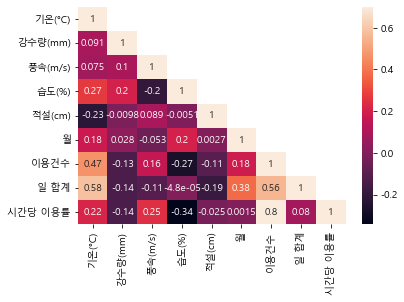

In [ ]:
corr_xy=data[['기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)','계절','월','이용건수','일 합계','시간당 이용률']]
corrz=corr_xy.corr()
corrz
mask = np.array(corrz)
mask[np.tril_indices_from(mask)]=False
fig.set_size_inches(30,10)
sns.heatmap(corrz,mask=mask,vmax=.7,annot=True)

기온(°C)   강수량(mm)   풍속(m/s)     습도(%)    적설(cm)      이용건수  \
우천여부                                                                       
0    기온(°C)   1.000000  0.423121 -0.007502  0.831537 -0.651902 -0.295234   
     강수량(mm)  0.423121  1.000000  0.118008  0.396267 -0.299755 -0.201673   
     풍속(m/s) -0.007502  0.118008  1.000000  0.081138  0.078682 -0.158670   
     습도(%)    0.831537  0.396267  0.081138  1.000000 -0.456069 -0.497721   
     적설(cm)  -0.651902 -0.299755  0.078682 -0.456069  1.000000  0.127120   
     이용건수    -0.295234 -0.201673 -0.158670 -0.497721  0.127120  1.000000   
     일 합계     0.227977  0.103873 -0.262211  0.038392 -0.253239  0.180849   
     시간당 이용률 -0.382139 -0.277783  0.036650 -0.441413  0.304259  0.745404   
1    기온(°C)   1.000000  0.092443  0.097553  0.243138       NaN  0.502311   
     강수량(mm)  0.092443  1.000000  0.028475  0.214291       NaN -0.129685   
     풍속(m/s)  0.097553  0.028475  1.000000 -0.270005       NaN  0.221713   
     습도(%)    0.243138  0.214291 -0.270005  1.000000       NaN -0.227753   
     적설(cm)        NaN       NaN       NaN       NaN       NaN       NaN   
     이용건수     0.502311 -0.129685  0.221713 -0.227753       NaN  1.000000   
     일 합계     0.622492 -0.121400 -0.055212  0.076244       NaN  0.530800   
     시간당 이용률  0.254605 -0.107077  0.297335 -0.309310       NaN  0.801391   

                  일 합계   시간당 이용률  
우천여부                              
0    기온(°C)   0.227977 -0.382139  
     강수량(mm)  0.103873 -0.277783  
     풍속(m/s) -0.262211  0.036650  
     습도(%)    0.038392 -0.441413  
     적설(cm)  -0.253239  0.304259  
     이용건수     0.180849  0.745404  
     일 합계     1.000000 -0.278907  
     시간당 이용률 -0.278907  1.000000  
1    기온(°C)   0.622492  0.254605  
     강수량(mm) -0.121400 -0.107077  
     풍속(m/s) -0.055212  0.297335  
     습도(%)    0.076244 -0.309310  
     적설(cm)        NaN       NaN  
     이용건수     0.530800  0.801391  
     일 합계     1.000000  0.040876  
     시간당 이용률  0.040876  1.000000

<AxesSubplot:ylabel='우천여부-None'>

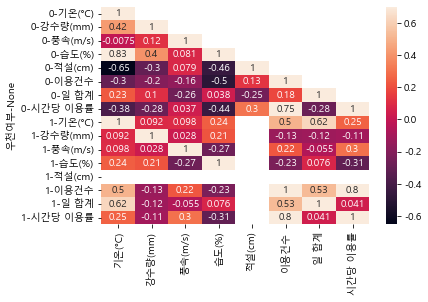

In [ ]:
corr_xy=data[['기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)','우천여부','이용건수','일 합계','시간당 이용률']]
corrz=corr_xy.groupby('우천여부').corr()
corrz
mask = np.array(corrz)
mask[np.tril_indices_from(mask)]=False
fig.set_size_inches(30,10)
sns.heatmap(corrz,mask=mask,vmax=.7,annot=True)

In [ ]:
data_ex1=pd.pivot_table(data,index='대여일자',values=['이용건수','강수량(mm)','적설(cm)'],aggfunc='sum')
data_ex2=pd.pivot_table(data,index='대여일자',values=['기온(°C)','풍속(m/s)','습도(%)'])

In [ ]:
data_fin=pd.concat([data_ex1,data_ex2],axis=1).reset_index()
data_fin['우천여부']=['no' if i==0 else 'yes' for i in data_fin['강수량(mm)']]
data_fin.head()

,대여일자,강수량(mm),이용건수,적설(cm),기온(°C),습도(%),풍속(m/s),우천여부
0,2020-01-01,0.1,15799,0.0,-2.708333,61.708333,1.104167,yes
1,2020-01-02,0.0,28418,0.0,0.987500,64.875000,1.912500,no
2,2020-01-03,0.0,30318,0.0,0.120833,57.833333,1.879167,no
3,2020-01-04,0.0,25061,0.0,1.054167,50.875000,1.895833,no
4,2020-01-05,0.0,22504,0.0,1.175000,45.666667,1.045833,no


<AxesSubplot:xlabel='기온(°C)', ylabel='이용건수'>

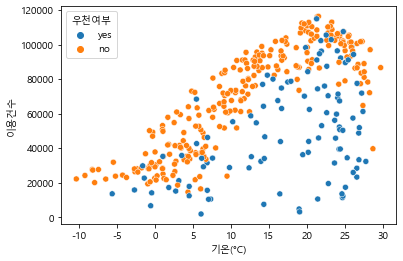

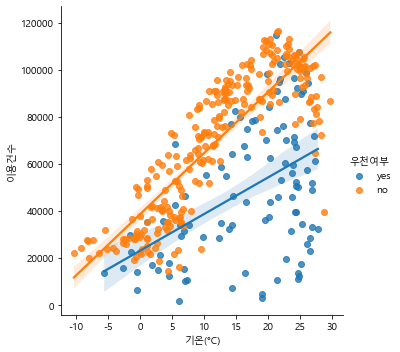

In [ ]:
sns.scatterplot(x=data_fin['기온(°C)'],y=data_fin['이용건수'],hue=data_fin['우천여부'])
sns.lmplot(x='기온(°C)',y='이용건수',hue='우천여부',data=data_fin)

<AxesSubplot:xlabel='풍속(m/s)', ylabel='이용건수'>

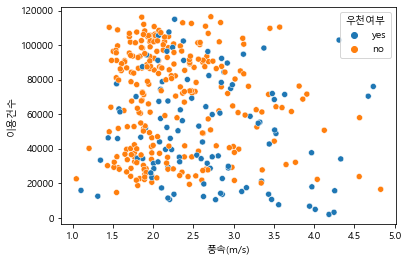

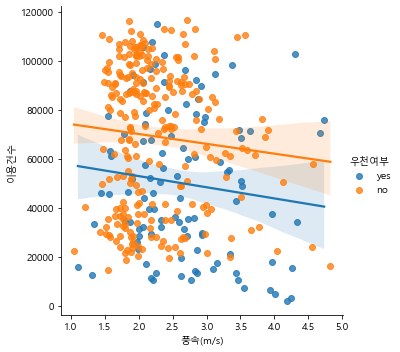

In [ ]:
sns.scatterplot(x=data_fin['풍속(m/s)'],y=data_fin['이용건수'],hue=data_fin['우천여부'])
sns.lmplot(x='풍속(m/s)',y='이용건수',hue='우천여부',data=data_fin)

<AxesSubplot:xlabel='강수량(mm)', ylabel='이용건수'>

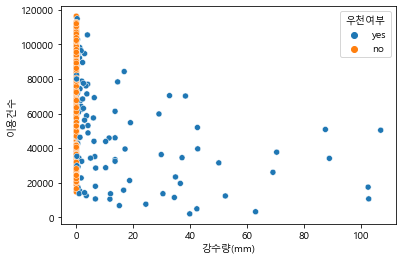

In [ ]:
sns.scatterplot(x=data_fin['강수량(mm)'],y=data_fin['이용건수'],hue=data_fin['우천여부'])

In [ ]:
data_fin

,대여일자,강수량(mm),이용건수,적설(cm),기온(°C),습도(%),풍속(m/s),우천여부
0,2020-01-01,0.1,15799,0.0,-2.708333,61.708333,1.104167,yes
1,2020-01-02,0.0,28418,0.0,0.987500,64.875000,1.912500,no
2,2020-01-03,0.0,30318,0.0,0.120833,57.833333,1.879167,no
3,2020-01-04,0.0,25061,0.0,1.054167,50.875000,1.895833,no
4,2020-01-05,0.0,22504,0.0,1.175000,45.666667,1.045833,no
...,...,...,...,...,...,...,...,...
361,2020-12-27,0.0,36352,0.0,5.395833,63.125000,1.850000,no
362,2020-12-28,1.3,46230,0.0,6.920833,71.000000,1.441667,yes
363,2020-12-29,0.2,35251,0.0,1.033333,71.958333,2.733333,yes
364,2020-12-30,0.0,22194,0.0,-10.366667,54.833333,4.037500,no


,대여일자,강수량(mm),이용건수,적설(cm),기온(°C),습도(%),풍속(m/s),우천여부,계절,평일/휴일,대여시간,시간대
0,2020-01-01,0.1,15799,0.0,-2.708333,61.708333,1.104167,yes,겨울,휴일,수,출/퇴근 외 시간대
1,2020-01-02,0.0,28418,0.0,0.987500,64.875000,1.912500,no,겨울,평일,목,출/퇴근 외 시간대
2,2020-01-03,0.0,30318,0.0,0.120833,57.833333,1.879167,no,겨울,평일,금,출/퇴근 외 시간대
3,2020-01-04,0.0,25061,0.0,1.054167,50.875000,1.895833,no,겨울,휴일,토,출/퇴근 외 시간대
4,2020-01-05,0.0,22504,0.0,1.175000,45.666667,1.045833,no,겨울,휴일,일,출/퇴근 외 시간대
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,0.0,36352,0.0,5.395833,63.125000,1.850000,no,겨울,휴일,일,출/퇴근 외 시간대
362,2020-12-28,1.3,46230,0.0,6.920833,71.000000,1.441667,yes,겨울,평일,월,출/퇴근 외 시간대
363,2020-12-29,0.2,35251,0.0,1.033333,71.958333,2.733333,yes,겨울,평일,화,출/퇴근 외 시간대
364,2020-12-30,0.0,22194,0.0,-10.366667,54.833333,4.037500,no,겨울,평일,수,출/퇴근 외 시간대


<AxesSubplot:xlabel='계절', ylabel='이용건수'>

<AxesSubplot:xlabel='평일/휴일', ylabel='이용건수'>

<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

<AxesSubplot:xlabel='시간대', ylabel='이용건수'>

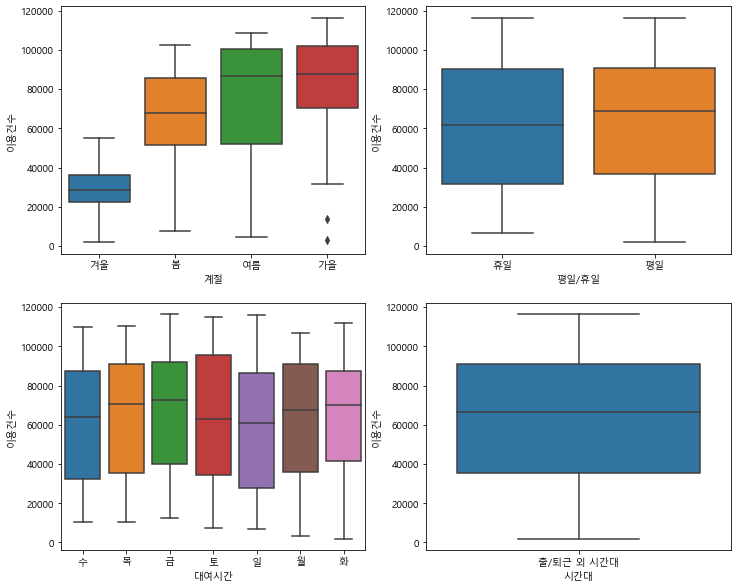

In [ ]:
data_fin['대여일자']=pd.to_datetime(data_fin['대여일자'])
data_fin['계절']=data_fin['대여일자'].apply(season)
data_fin['평일/휴일']=data_fin['대여일자'].apply(return_holidays)
data_fin['대여시간']=data_fin['대여일자'].apply(return_day)
data_fin['시간대']=data_fin['대여일자'].apply(work_hour)

data_fin

fig ,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=data_fin,x='계절',y='이용건수',ax=axes[0][0])
sns.boxplot(data=data_fin,x='평일/휴일',y='이용건수',ax=axes[0][1])
sns.boxplot(data=data_fin,x='대여시간',y='이용건수',ax=axes[1][0])
sns.boxplot(data=data_fin,x='시간대',y='이용건수',ax=axes[1][1])

<AxesSubplot:xlabel='이용건수', ylabel='Density'>

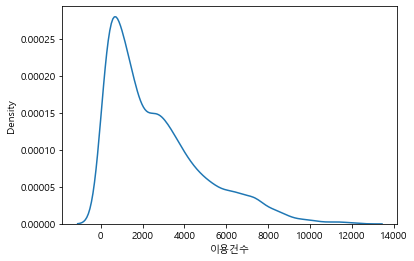

In [ ]:
sns.kdeplot(tot.이용건수)
# sns.kdeplot(tot['시간당 이용률'])
# 확률밀도함수 

<Figure size 720x360 with 0 Axes>

((array([-3.77790016, -3.55091299, -3.42620951, ...,  3.42620951,
          3.55091299,  3.77790016]),
  array([    8,    15,    18, ..., 12100, 12243, 12337], dtype=int64)),
 (2138.757628135, 2655.0766685681683, 0.943656885519941))

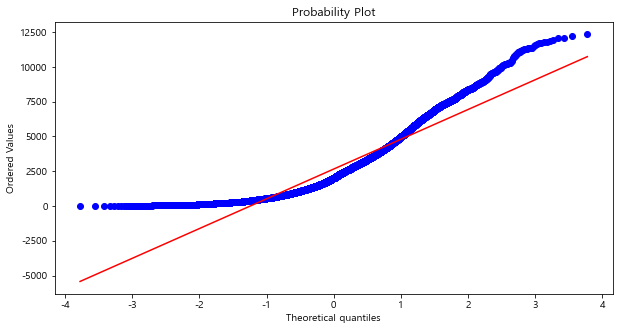

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(10,5))
stats.probplot(tot.이용건수,dist=stats.norm,plot=plt)

In [ ]:
X = data_fin[['기온(°C)','강수량(mm)','풍속(m/s)','적설(cm)','습도(%)']].values
y = data_fin['이용건수'].values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)

## 기울기
r_square = lr.score(X_test,y_test)
print('R_square : ',r_square)
print('X 기울기 : ',lr.coef_)

## 절편
print('절편 :' ,lr.intercept_)


LinearRegression()

R_square :  0.628924591820467
X 기울기 :  [2728.60521785 -912.69449693  534.83542336  -48.06500031 -588.65308436]
절편 : 67590.2888459205


<Figure size 720x360 with 0 Axes>

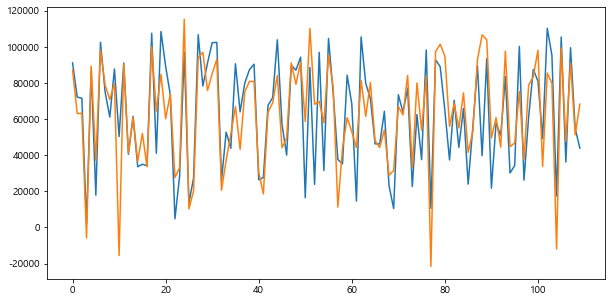

In [ ]:
y_hat= lr.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test, label='y_test')
plt.plot(y_hat, label='y_hat')

# 대여소정보

In [ ]:
spot['시간대']=spot['대여시간'].apply(work_hour)
spot['대여소 번호']=spot['대여소번호']
spot.drop('대여소번호',axis=1,inplace=True)
spot

,대여시간,이용건수,시간대,대여소 번호
0,0,6,출/퇴근 외 시간대,10
1,0,222,출/퇴근 외 시간대,101
2,0,828,출/퇴근 외 시간대,102
3,0,748,출/퇴근 외 시간대,103
4,0,299,출/퇴근 외 시간대,104
...,...,...,...,...
51019,23,82,출/퇴근 외 시간대,4711
51020,23,1,출/퇴근 외 시간대,4761
51021,23,2,출/퇴근 외 시간대,4784
51022,23,2,출/퇴근 외 시간대,4791


In [ ]:
place=pd.read_csv('공공자전거 대여소 정보(21.01.31 기준).csv',index_col=0,encoding='cp949')
places=place[['보관소(대여소)명','자치구','상세주소','위도','경도']]
places['대여소명']=places['보관소(대여소)명']
places

,보관소(대여소)명,자치구,상세주소,위도,경도,대여소명
대여소 번호,,,,,,
301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,경복궁역 7번출구 앞
302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,경복궁역 4번출구 뒤
303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,광화문역 1번출구 앞
304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,광화문역 2번출구 앞
305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,종로구청 옆
...,...,...,...,...,...,...
1085,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,래미안 솔베뉴(고덕로)
1086,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,래미안 솔베뉴(구천면로)
1088,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,풍납사거리(강동)


In [ ]:
places.drop('보관소(대여소)명',axis=1,inplace=True)
places.reset_index(inplace=True)
places=places.rename(columns={'대여소\n번호':'대여소번호'})
places

,대여소 번호,자치구,상세주소,위도,경도,대여소명
0,301,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,경복궁역 7번출구 앞
1,302,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,경복궁역 4번출구 뒤
2,303,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,광화문역 1번출구 앞
3,304,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,광화문역 2번출구 앞
4,305,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,종로구청 옆
...,...,...,...,...,...,...
2149,1085,강동구,양재대로1650,37.554569,127.145874,래미안 솔베뉴(고덕로)
2150,1086,강동구,양재대로1650,37.550598,127.145454,래미안 솔베뉴(구천면로)
2151,1088,강동구,성내동451-3,37.528122,127.119522,풍납사거리(강동)
2152,1089,강동구,고덕동 675,37.560600,127.146698,고덕 래미안힐스테이트(201동)


In [ ]:
places['대여소 번호'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2154 entries, 0 to 2153
Series name: 대여소 번호
Non-Null Count  Dtype
--------------  -----
2154 non-null   int64
dtypes: int64(1)
memory usage: 17.0 KB


In [ ]:
spots= pd.merge(spot,places,how='left',on='대여소 번호')
spots
spots.info()

,대여시간,이용건수,시간대,대여소 번호,자치구,상세주소,위도,경도,대여소명
0,0,6,출/퇴근 외 시간대,10,NaN,NaN,NaN,NaN,NaN
1,0,222,출/퇴근 외 시간대,101,마포구,서울특별시 마포구 동교로8길 58,37.549561,126.905754,(구)합정동 주민센터
2,0,828,출/퇴근 외 시간대,102,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,망원역 1번출구 앞
3,0,748,출/퇴근 외 시간대,103,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,망원역 2번출구 앞
4,0,299,출/퇴근 외 시간대,104,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,합정역 1번출구 앞
...,...,...,...,...,...,...,...,...,...
51043,23,82,출/퇴근 외 시간대,4711,종로구,종로구 혜화동 9-8,NaN,NaN,올림픽기념 국민생활관 로터리
51044,23,1,출/퇴근 외 시간대,4761,중구,초동 107-9,NaN,NaN,탐앤탐스 을지로3가점
51045,23,2,출/퇴근 외 시간대,4784,중구,저동2가 22-1,NaN,NaN,중부경찰서앞 사거리
51046,23,2,출/퇴근 외 시간대,4791,중구,중구 충무로2가 111,NaN,NaN,명동역9번출구


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51048 entries, 0 to 51047
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여시간    51048 non-null  int64  
 1   이용건수    51048 non-null  int64  
 2   시간대     51048 non-null  object 
 3   대여소 번호  51048 non-null  int64  
 4   자치구     50261 non-null  object 
 5   상세주소    50261 non-null  object 
 6   위도      48872 non-null  float64
 7   경도      48872 non-null  float64
 8   대여소명    50261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


In [ ]:
rank_spots=spots.sort_values(by='이용건수',ascending=False)
ranks=rank_spots.head(100)
ranks.dropna(axis=0,inplace=True)

In [ ]:
ranks

,대여시간,이용건수,시간대,대여소 번호,자치구,상세주소,위도,경도,대여소명
38595,18,13863,퇴근시간대,502,광진구,서울특별시 광진구 능동로 10,37.531860,127.067192,뚝섬유원지역 1번출구 앞
36178,17,13252,퇴근시간대,207,영등포구,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098,여의나루역 1번출구 앞
38331,18,12556,퇴근시간대,207,영등포구,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098,여의나루역 1번출구 앞
40752,19,12230,퇴근시간대,502,광진구,서울특별시 광진구 능동로 10,37.531860,127.067192,뚝섬유원지역 1번출구 앞
45025,21,12105,출/퇴근 외 시간대,502,광진구,서울특별시 광진구 능동로 10,37.531860,127.067192,뚝섬유원지역 1번출구 앞
...,...,...,...,...,...,...,...,...,...
32681,15,4817,출/퇴근 외 시간대,1210,송파구,서울특별시 송파구 올림픽로 293-19,37.513126,127.100960,롯데월드타워(잠실역2번출구 쪽)
38896,18,4802,퇴근시간대,907,은평구,서울특별시 은평구 역촌동 43-11,37.599491,126.916862,CJ 드림시티
42234,19,4774,퇴근시간대,2701,강서구,강서구 마곡동 761-5,37.565201,126.827316,마곡나루역 5번출구 뒤편
33332,15,4763,출/퇴근 외 시간대,2219,서초구,서울특별시 서초구 신반포로 지하 188,37.506199,127.003944,"고속터미널역 8-1번, 8-2번 출구 사이"


##  대여소별 TOP 100 지도 시각화 

In [ ]:
ranks[['위도','경도','대여소명']]

,위도,경도,대여소명
38595,37.531860,127.067192,뚝섬유원지역 1번출구 앞
36178,37.526989,126.932098,여의나루역 1번출구 앞
38331,37.526989,126.932098,여의나루역 1번출구 앞
40752,37.531860,127.067192,뚝섬유원지역 1번출구 앞
45025,37.531860,127.067192,뚝섬유원지역 1번출구 앞
...,...,...,...
32681,37.513126,127.100960,롯데월드타워(잠실역2번출구 쪽)
38896,37.599491,126.916862,CJ 드림시티
42234,37.565201,126.827316,마곡나루역 5번출구 뒤편
33332,37.506199,127.003944,"고속터미널역 8-1번, 8-2번 출구 사이"


In [ ]:
latitude=37.5502
longitude=126.982
import folium
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=10.5
)

coords = ranks[['위도','경도']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

In [ ]:
gu_map=ranks[['자치구','이용건수']]
gu=gu_map.groupby('자치구')['이용건수'].sum()
print(gu)

자치구
강서구      68147
관악구      56675
광진구     126180
구로구      29754
마포구      59711
서초구      41942
성동구      58910
송파구      30076
양천구      10215
영등포구    160378
은평구       4802
Name: 이용건수, dtype: int64


In [ ]:
import json

geo_path='../ch05__data/data/02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))


bins = list(gu.quantile([0, 0.25, 0.5, 0.75, 1]))
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=geo_str,
             data=gu, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name='구별 TOP100 대여소 이용건수'
            )
m

# TOP 100 출퇴근시간대별 대여소현황

In [ ]:
gu_am=ranks.loc[ranks['시간대']=='출근시간대'].groupby('자치구')['이용건수'].sum()
gu_am
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=geo_str,
             data=gu_am, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="출근시간대"
            )
for lat, long in zip(ranks['위도'], ranks['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(m)
m

자치구
강서구    8517
Name: 이용건수, dtype: int64

In [ ]:
gu_pm=ranks.loc[ranks['시간대']=='퇴근시간대'].groupby('자치구')['이용건수'].sum()
gu_pm
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=geo_str,
             data=gu_pm, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="퇴근시간대"
            )
for lat, long in zip(ranks['위도'], ranks['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(m)
m

자치구
강서구     54788
관악구     30544
광진구     55369
구로구     29754
마포구     26147
서초구     20865
성동구     33091
송파구     19532
양천구     10215
영등포구    86250
은평구      4802
Name: 이용건수, dtype: int64

In [ ]:
gu_ect=ranks.loc[ranks['시간대']=='출/퇴근 외 시간대'].groupby('자치구')['이용건수'].sum()
gu_ect
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=geo_str,
             data=gu_ect, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="출/퇴근 외 시간대"
            )
for lat, long in zip(ranks['위도'], ranks['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(m)

m

자치구
강서구      4842
관악구     26131
광진구     70811
마포구     33564
서초구     21077
성동구     25819
송파구     10544
영등포구    74128
Name: 이용건수, dtype: int64